In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [265]:
data = pd.read_csv('data_finish.csv')
data

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


In [266]:
data_jakarta_timur = data.loc[data['region_name'] == 'Jakarta Timur']
data_jakarta_timur


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
5251,2016-01-01,25.0,33.4,24.8,82.0,0.8,NaN,9.0,280.0,4.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
5252,2016-01-02,24.0,32.2,24.8,84.0,4.8,NaN,9.0,260.0,1.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1
5253,2016-01-03,24.3,33.8,24.1,76.0,4.8,NaN,7.0,270.0,2.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1
5254,2016-01-04,24.4,34.2,24.5,71.0,0.4,NaN,6.0,270.0,2.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
5255,2016-01-05,25.2,33.0,24.7,66.0,NaN,NaN,6.0,270.0,4.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


In [267]:
data.head(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
5,2016-01-06,25.0,33.6,28.9,80.0,3.8,3.6,4.0,190.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
6,2016-01-07,25.2,35.6,30.0,78.0,NaN,7.6,4.0,60.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
7,2016-01-08,26.8,NaN,29.9,79.0,NaN,7.9,4.0,50.0,2.0,SE,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
8,2016-01-09,26.8,34.8,29.7,79.0,NaN,10.2,4.0,110.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
9,2016-01-10,25.4,34.6,29.2,80.0,NaN,8.2,3.0,80.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0


In [268]:
sorted_data = data.sort_values('date')
sorted_data.tail(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
3433,2020-12-28,26.9,31.6,28.7,78.0,0.0,7.7,6.0,270.0,3.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Jakarta Utara,0
1655,2020-12-29,24.8,30.8,27.1,82.0,0.1,6.1,7.0,240.0,3.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
5248,2020-12-29,26.4,32.0,28.3,73.0,0.0,5.3,9.0,290.0,2.0,C,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0
3434,2020-12-29,26.5,31.2,28.3,77.0,0.0,6.8,7.0,280.0,4.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Jakarta Utara,0
1656,2020-12-30,24.6,30.8,27.0,81.0,0.3,1.4,4.0,260.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
5249,2020-12-30,25.6,32.6,28.0,75.0,NaN,1.5,5.0,270.0,2.0,W,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0
3435,2020-12-30,26.5,32.0,27.8,80.0,NaN,2.9,8.0,270.0,4.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Jakarta Utara,0
3436,2020-12-31,25.0,29.0,26.2,87.0,34.0,1.4,6.0,270.0,3.0,W,96741,Stasiun Meteorologi Maritim Tanjung Priok,Jakarta Utara,0
1657,2020-12-31,24.4,29.8,26.4,88.0,0.5,0.1,4.0,250.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
5250,2020-12-31,25.6,30.2,26.5,83.0,5.0,0.2,4.0,240.0,1.0,C,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0


In [269]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [270]:
data['month'] = data.index.month
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek

In [271]:
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car', 'month', 'day', 'dayofweek']
X = data[features]
y = data['RH_avg']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'W '

In [ ]:
y_test = np.nan_to_num(y_test, nan=0)
y_pred = np.nan_to_num(y_pred, nan=0)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [ ]:
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 26.217776307448496
Mean Absolute Error: 3.064553618594823


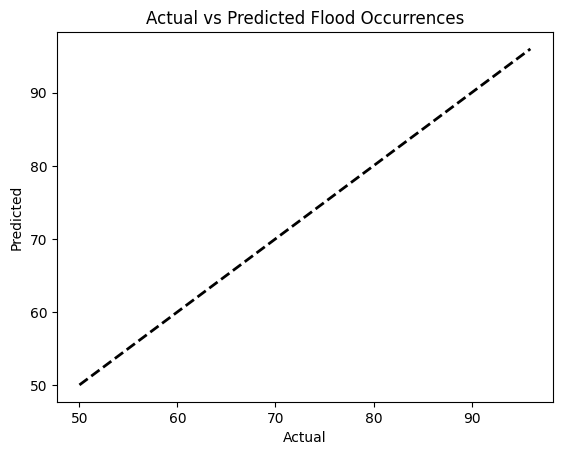

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Flood Occurrences')
plt.show()
X = X.dropna()

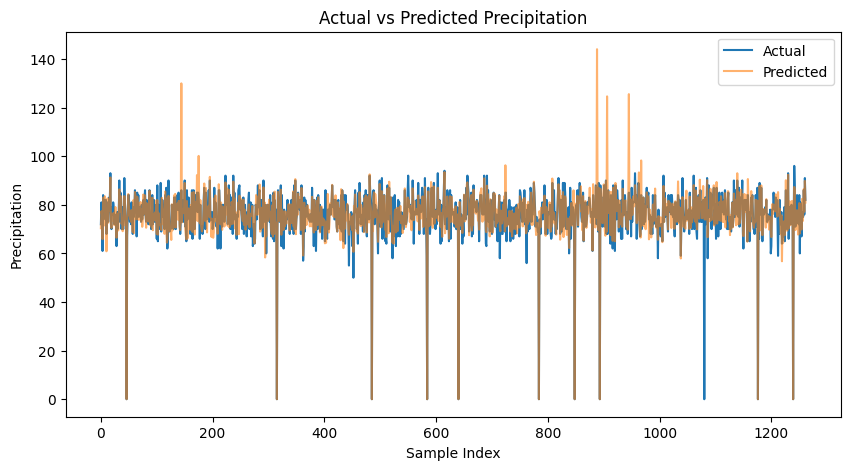

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.6)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.show()



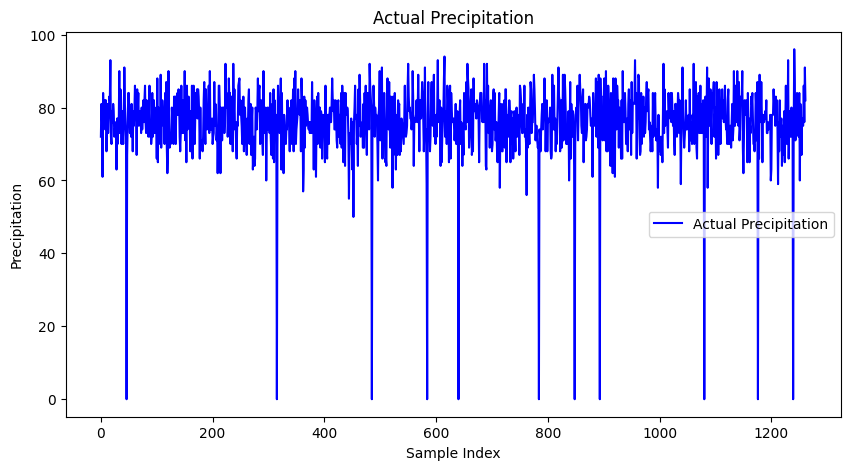

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Precipitation', color='b')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.title('Actual Precipitation')
plt.show()

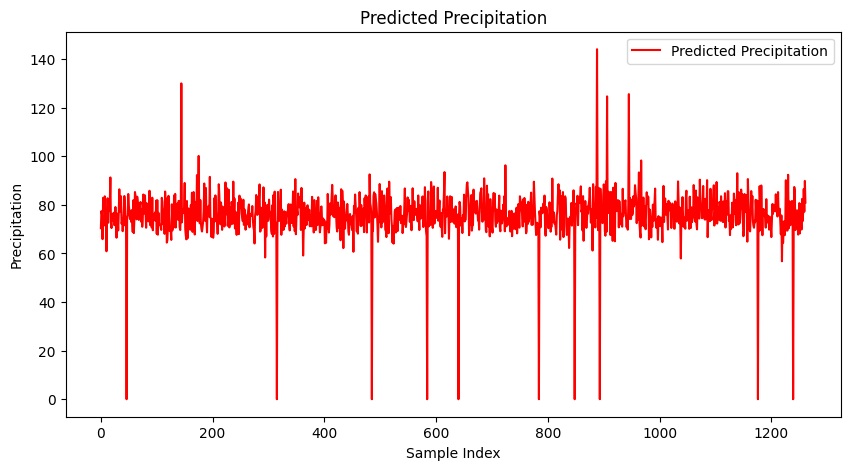

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='Predicted Precipitation', color='r')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.title('Predicted Precipitation')
plt.show()

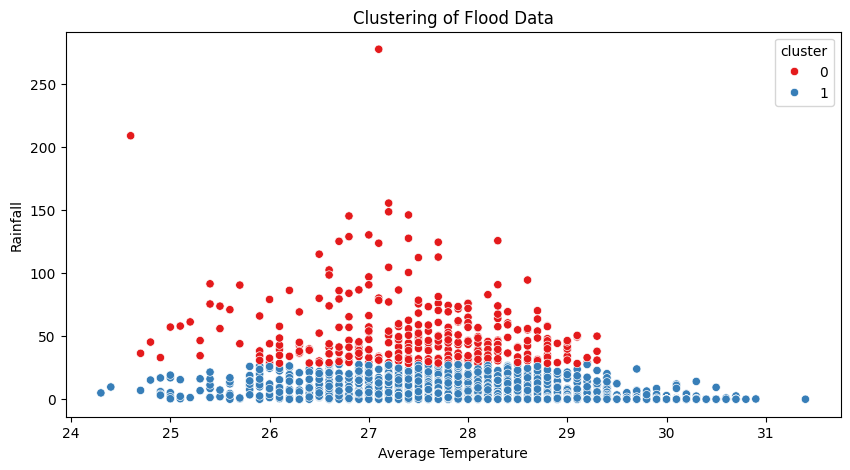

In [ ]:
# Combine the features into a single dataframe
data['flood'] = data['flood'].astype(int)
flood_data = data[['Tavg', 'RR', 'ff_avg', 'ss', 'month', 'day', 'dayofweek', 'flood']].dropna()

# Perform clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(flood_data.drop('flood', axis=1))

# Add cluster labels to the dataframe
flood_data['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=flood_data, x='Tavg', y='RR', hue='cluster', palette='Set1')
plt.xlabel('Average Temperature')
plt.ylabel('Rainfall')
plt.title('Clustering of Flood Data')
plt.show()

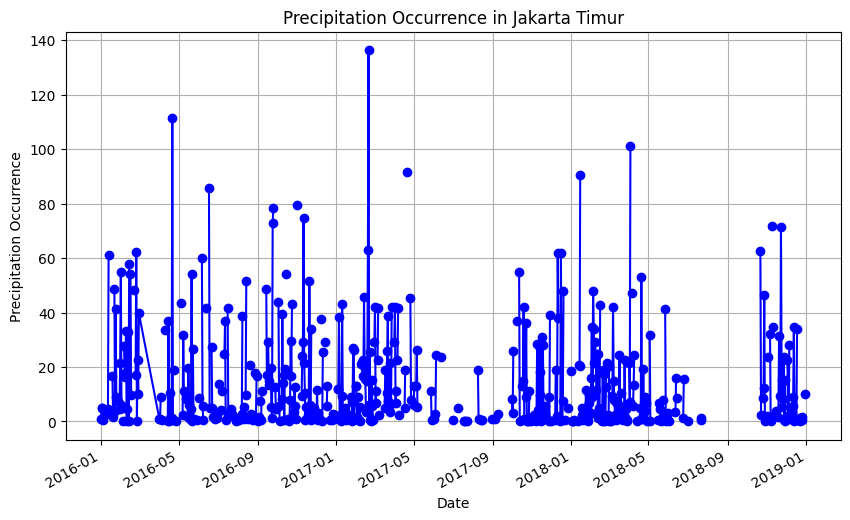

In [ ]:
# Filter data for 'Jakarta Timur' region
data_jakarta_timur = data[data['region_name'] == 'Jakarta Timur']

# Plot precipitation occurrence
plt.figure(figsize=(10, 6))
data_jakarta_timur['RR'].plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation Occurrence')
plt.title('Precipitation Occurrence in Jakarta Timur')
plt.grid(True)
plt.show()

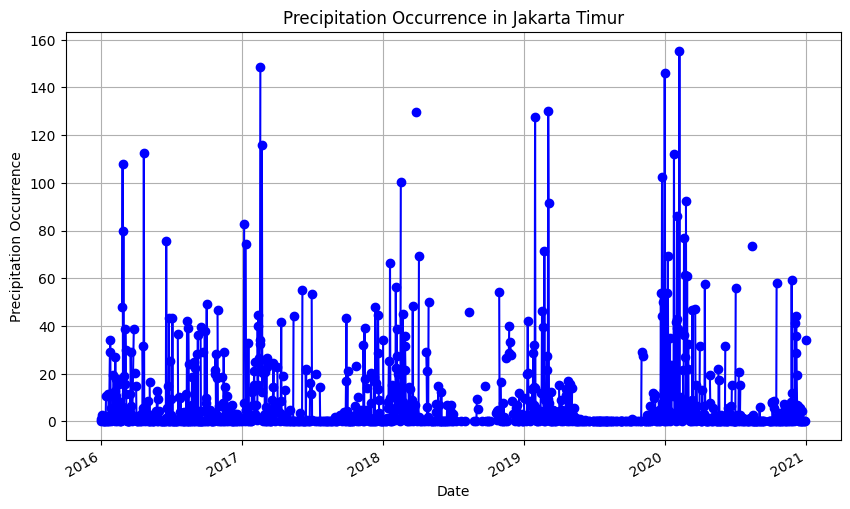

In [ ]:
# Filter data for 'Jakarta Utara' region
data_jakarta_utara = data[data['region_name'] == 'Jakarta Utara']

# Plot precipitation occurrence
plt.figure(figsize=(10, 6))
data_jakarta_utara['RR'].plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation Occurrence')
plt.title('Precipitation Occurrence in Jakarta Timur')
plt.grid(True)
plt.show()

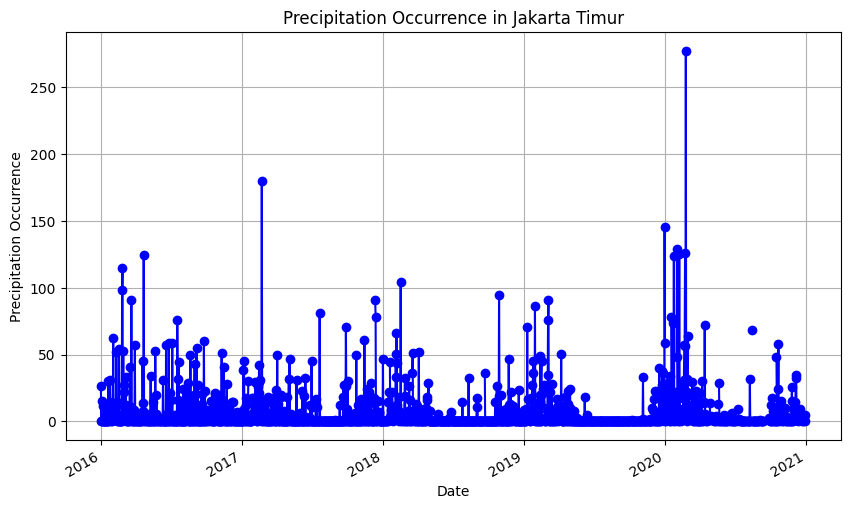

In [ ]:
# Filter data for 'Jakarta Pusat' region
data_jakarta_pusat = data[data['region_name'] == 'Jakarta Pusat']

# Plot precipitation occurrence
plt.figure(figsize=(10, 6))
data_jakarta_pusat['RR'].plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation Occurrence')
plt.title('Precipitation Occurrence in Jakarta Timur')
plt.grid(True)
plt.show()

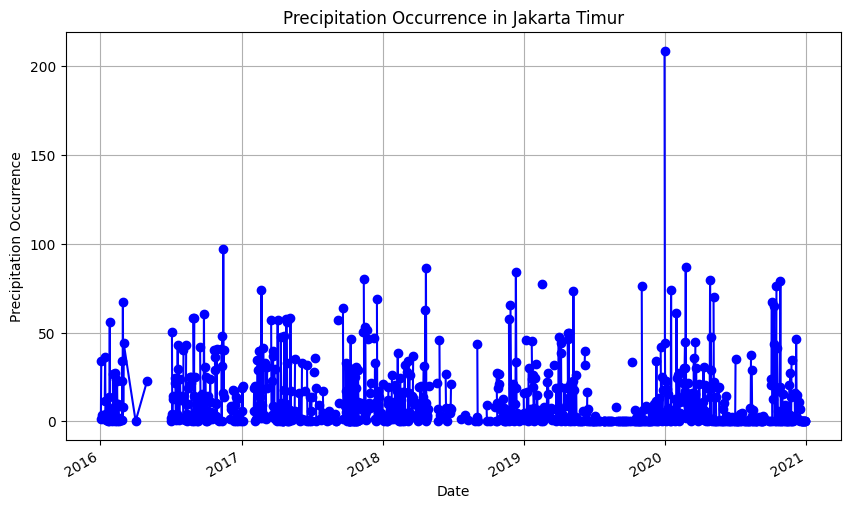

In [ ]:
# Filter data for 'Jakarta Selatan' region
data_jakarta_selatan = data[data['region_name'] == 'Jakarta Selatan']

# Plot precipitation occurrence
plt.figure(figsize=(10, 6))
data_jakarta_selatan['RR'].plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation Occurrence')
plt.title('Precipitation Occurrence in Jakarta Timur')
plt.grid(True)
plt.show()

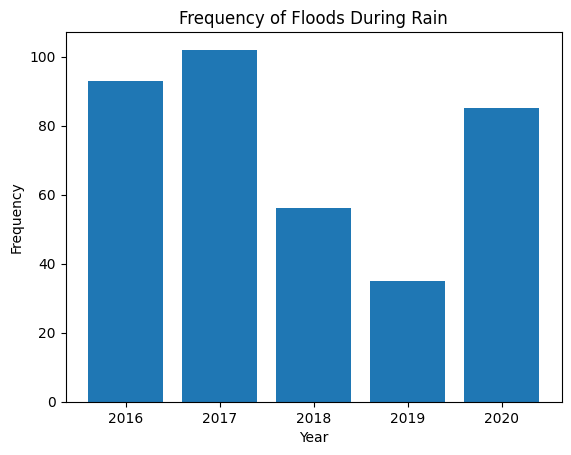

In [ ]:
# Filter the data for rows with rain and flood
rain_flood_data = data[(data['RR'].notnull()) & (data['flood'] == 1)]

# Group the filtered data by year and count the occurrences
flood_frequency = rain_flood_data.groupby(rain_flood_data.index.year).size()

# Create a bar plot
plt.bar(flood_frequency.index, flood_frequency.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Floods During Rain')
plt.show()

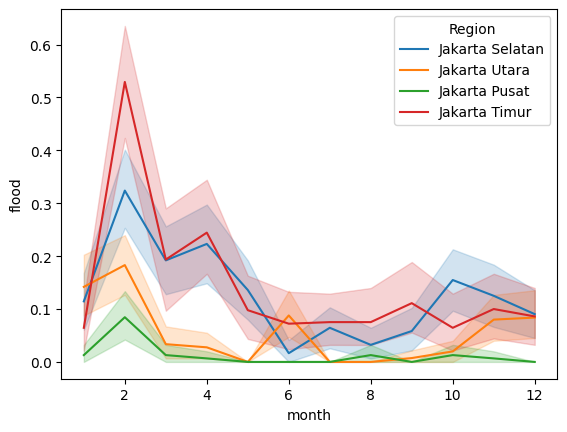

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with a 'region_name' column
sns.lineplot(data=data, x='month', y='flood', hue='region_name')

# Set custom line colors
palette = sns.color_palette("hls", len(data['region_name'].unique()))
sns.set_palette(palette)

# Add legend and show the plot
plt.legend(title='Region')
plt.show()

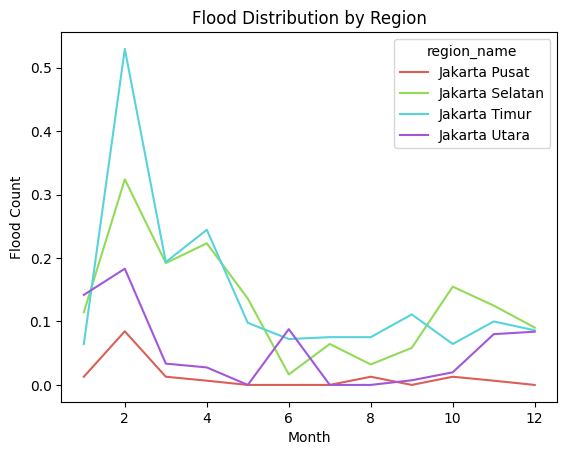

In [ ]:
# Group the data by region and month and calculate the average flood distribution
average_flood_distribution_by_region = data.groupby(['region_name', 'month'])['flood'].mean().reset_index()

# Create line plots for each region
sns.lineplot(data=average_flood_distribution_by_region, x='month', y='flood', hue='region_name')

# Set the title and labels for the plot
plt.title('Flood Distribution by Region')
plt.xlabel('Month')
plt.ylabel('Flood Count')

# Show the plot
plt.show()

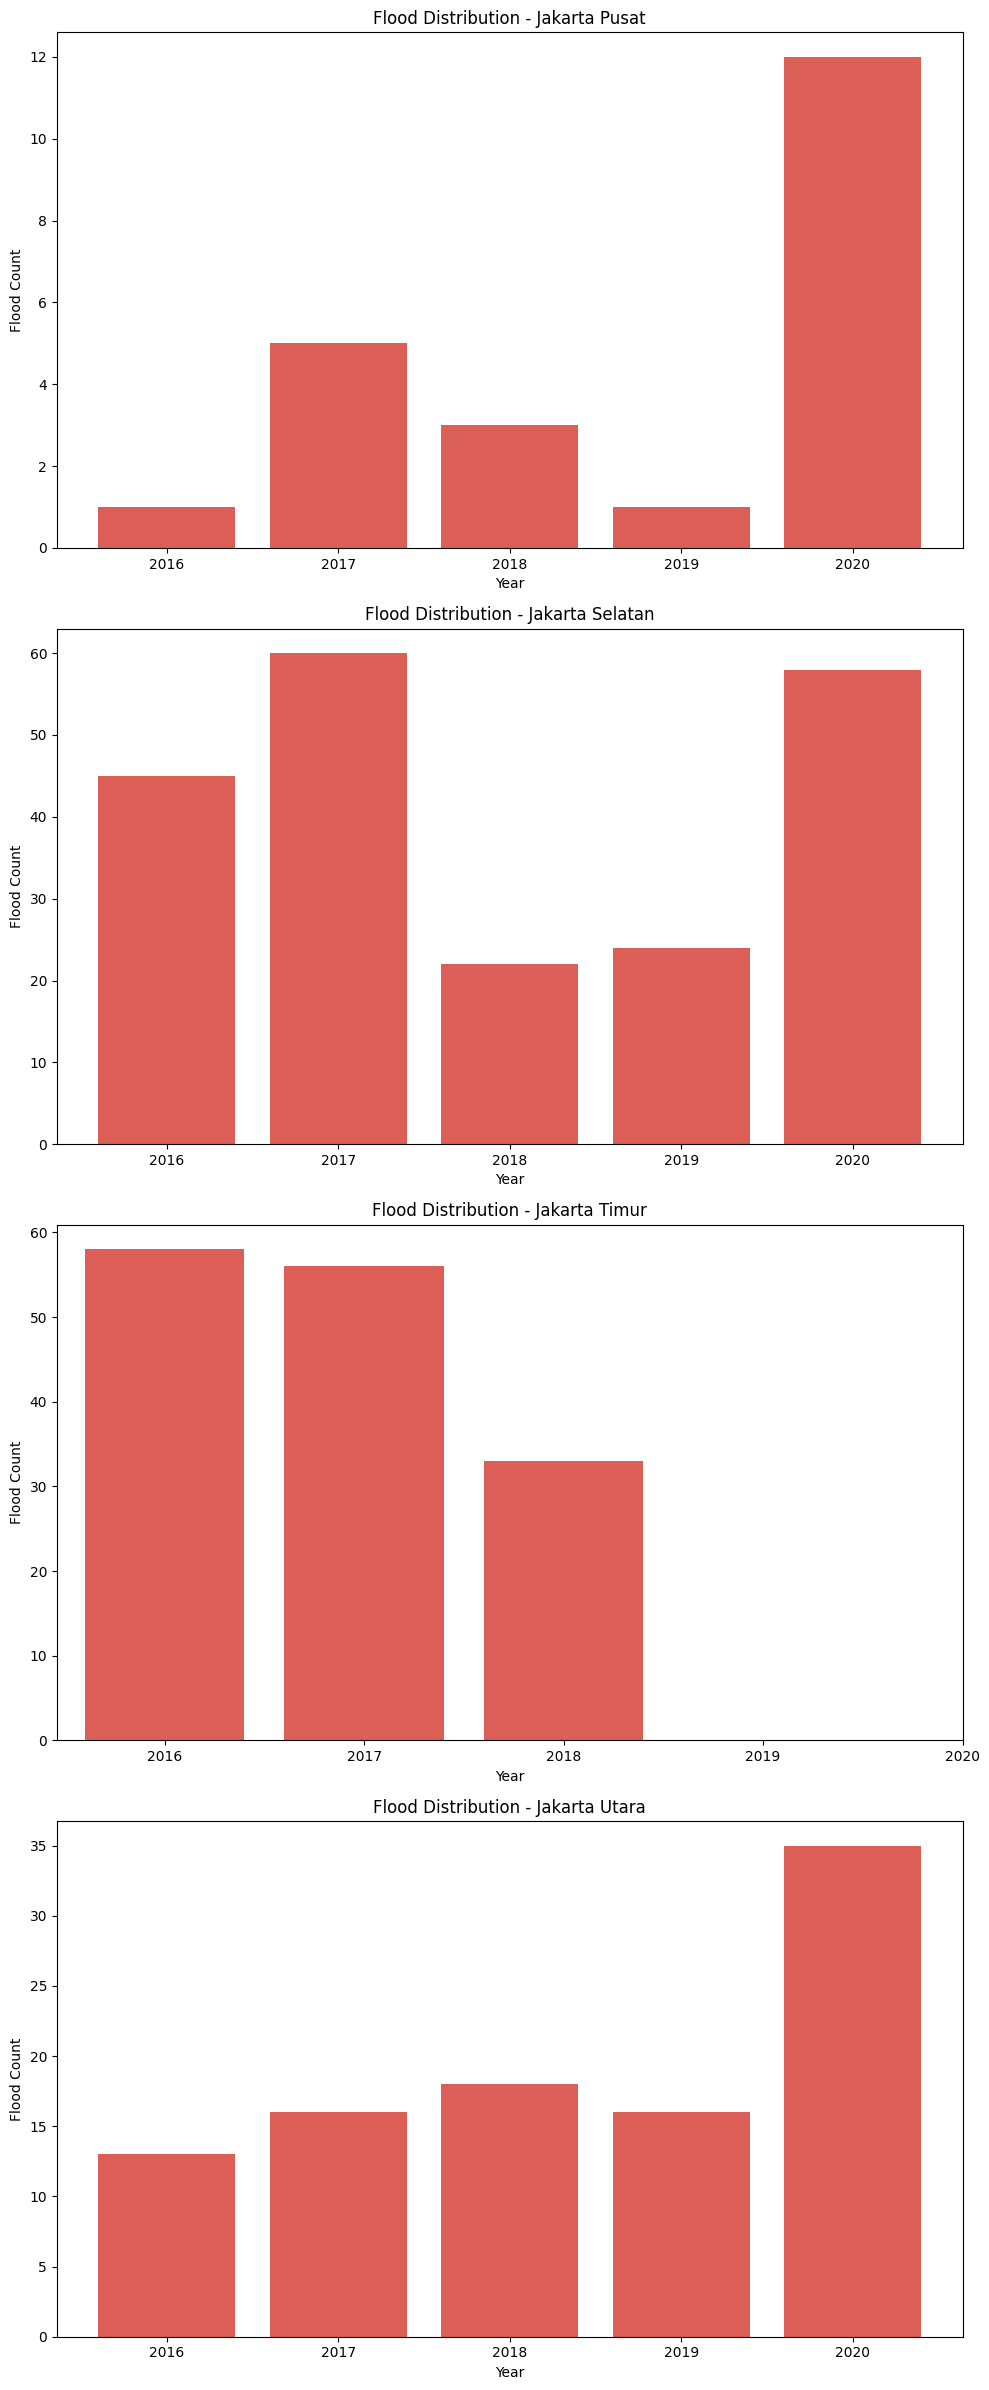

In [ ]:
# Group the data by region and year
grouped_data = data.groupby([data.index.year, 'region_name'])['flood'].sum().unstack()

# Convert the index to integer
grouped_data.index = grouped_data.index.astype(int)

# Plot the flood distribution for each region and year
fig, axes = plt.subplots(nrows=len(grouped_data.columns), ncols=1, figsize=(10, 6*len(grouped_data.columns)))

for i, region in enumerate(grouped_data.columns):
    ax = axes[i]
    ax.bar(grouped_data.index, grouped_data[region])
    ax.set_title(f"Flood Distribution - {region}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Flood Count")
    ax.set_xticks(np.arange(min(grouped_data.index), max(grouped_data.index)+1))

plt.tight_layout()
plt.show()

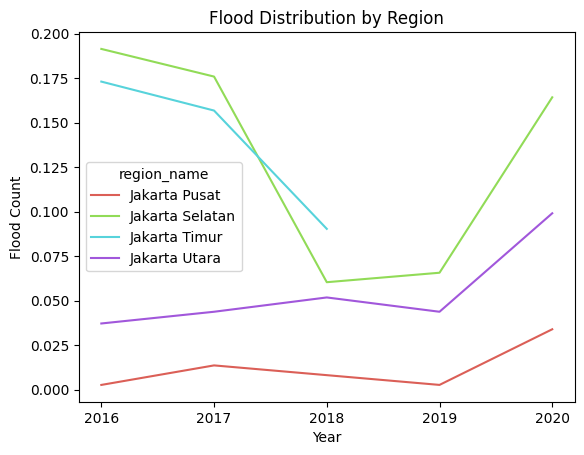

In [ ]:

data['Year'] = data.index.year
average_flood_distribution_by_region = data.groupby(['region_name', 'Year'])['flood'].mean().reset_index()

# Create line plots for each region
sns.lineplot(data=average_flood_distribution_by_region, x='Year', y='flood', hue='region_name')

# Set the title and labels for the plot
plt.title('Flood Distribution by Region')
plt.xlabel('Year')
plt.ylabel('Flood Count')
plt.xticks(np.arange(min(average_flood_distribution_by_region['Year']), max(average_flood_distribution_by_region['Year'])+1, 1.0))

# Show the plot
plt.show()

In [ ]:
# Assuming your data is stored in the 'data' DataFrame
data_by_year = data.groupby(data.index.year)

# Iterate over each year and access the data for that year
for year, year_data in data_by_year:
    print(f"Data for year {year}:")
    print(year_data)
    print()
ax.legend()

# Show the plot
plt.show()

Data for year 2016:
              Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg ddd_car  \
date                                                                           
2016-01-01  26.0  34.8  28.6    81.0   NaN  5.8   5.0  280.0     2.0      S    
2016-01-02  25.6  33.2  27.0    88.0   1.6  8.7   4.0  290.0     2.0      W    
2016-01-03  24.4  34.9  28.1    80.0  33.8  5.4   4.0  280.0     2.0      SW   
2016-01-04  24.8  33.6  29.2    81.0   NaN  6.6   3.0  200.0     1.0      S    
2016-01-05  25.8  33.6  26.7    91.0   NaN  3.2   3.0  180.0     1.0      S    
...          ...   ...   ...     ...   ...  ...   ...    ...     ...     ...   
2016-12-27  24.6  31.8  27.5    73.0   NaN  NaN   8.0  250.0     4.0      W    
2016-12-28  24.0  32.4  28.6    70.0   0.8  NaN   7.0  260.0     4.0      W    
2016-12-29  24.8  31.9  27.6    79.0   NaN  NaN   5.0  320.0     2.0      W    
2016-12-30  24.4  31.8  27.3    82.0   2.2  NaN   5.0  360.0     1.0      W    
2016-12-31  25.0  33

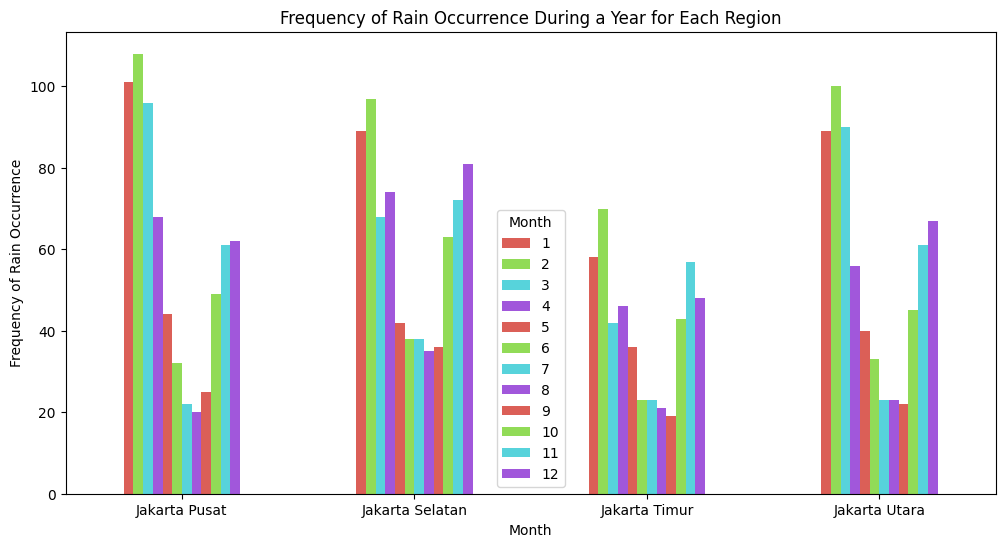

In [ ]:
# Group data by region and month
grouped_data = data[data['RR'] > 0].groupby(['region_name', 'month'])

# Count the number of occurrences of rain for each month in each region
rain_frequency = grouped_data.size().unstack()

# Plot the frequency of rain occurrence for each region
rain_frequency.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Frequency of Rain Occurrence')
plt.title('Frequency of Rain Occurrence During a Year for Each Region')
plt.legend(title='Month')
plt.xticks(rotation=0)
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

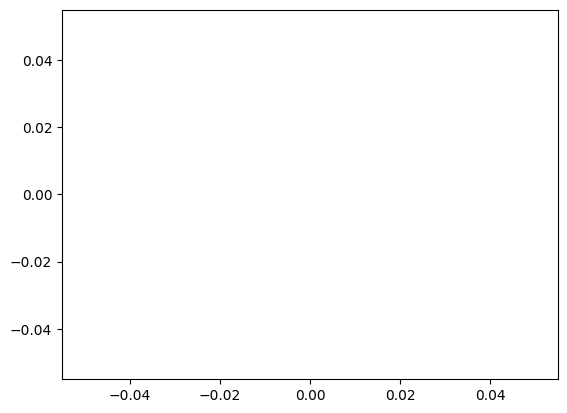

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='RR', y='flood')
plt.xlabel('Rainfall (RR)')
plt.ylabel('Flood Occurrence')
plt.title('Rainfall vs Flood Occurrence')
plt.show()